In [ ]:
# BERTopic implementation

In [ ]:
from bertopic import BERTopic
from hdbscan import HDBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import torch
import tensorflow.keras as tf_keras
from umap import UMAP
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords

In [2]:
labels = ['anger', 'joy', 'optimism', 'sadness']

In [21]:
df = pd.read_csv('roberta_tweets.csv')
df.head()

,Unnamed: 0,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,scores,anger,joy,optimism,sadness
0,1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,"[0.017996026, 0.91887456, 0.0560215, 0.0071078...",0.017996,0.918875,0.056022,0.007108
1,3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,"[0.8863315, 0.005368295, 0.016380254, 0.09191985]",0.886332,0.005368,0.016380,0.091920
2,6,1223640662689689602,Getting a little exercise this morning! https:...,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f,"[0.027001675, 0.7562563, 0.17825153, 0.03849056]",0.027002,0.756256,0.178252,0.038491
3,14,1215247978966986752,Thank you Elise! https://t.co/Y4Hb0zf5jk,f,f,Twitter for iPhone,48510,11608,2020-01-09 12:24:31,f,"[0.036250062, 0.8392923, 0.101642035, 0.022815...",0.036250,0.839292,0.101642,0.022816
4,15,1319491234042269696,"As per your request, Joe... https://t.co/78mzc...",f,f,Twitter for iPhone,253761,79855,2020-10-23 04:09:59,f,"[0.3175247, 0.31368554, 0.22997703, 0.13881272]",0.317525,0.313686,0.229977,0.138813


In [22]:
df['date'] = pd.to_datetime(df['date'])
df['primary'] = df.apply(
    lambda x: labels[np.argmax([x.anger,x.joy,x.optimism,x.sadness])] 
    if np.max([x.anger,x.joy,x.optimism,x.sadness]) > 0.5 else 'ambiguous',
    axis=1
)
df['primary'].value_counts()

anger        6860
joy          3894
optimism     3104
ambiguous    1435
sadness       543
Name: primary, dtype: int64

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nitomanto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords

In [54]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=10, n_components=3)
hdbscan_model = HDBSCAN(min_cluster_size=100,
                        gen_min_span_tree=True,
                        prediction_data=True)
stopwords = list(stopwords.words('english')) + ['http', 'https', 'amp', 'com', 'co']
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

In [55]:
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
docs = df['text']
topics, probs = topic_model.fit_transform(docs)

2025-03-08 15:35:27,963 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/495 [00:00<?, ?it/s]

2025-03-08 16:48:53,154 - BERTopic - Embedding - Completed ✓
2025-03-08 16:48:53,189 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-08 16:49:00,742 - BERTopic - Dimensionality - Completed ✓
2025-03-08 16:49:00,774 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-08 16:49:03,541 - BERTopic - Cluster - Completed ✓
2025-03-08 16:49:03,747 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-08 16:49:06,997 - BERTopic - Representation - Completed ✓


## BERTopic Visualization

In [56]:
topic_model.visualize_topics()

In [57]:
topic_model.visualize_hierarchy()

In [130]:
topic_model.visualize_barchart()

In [165]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6041,-1_great_president_people_america,"[great, president, people, america, thank]","[MAKE AMERICA GREAT AGAIN!, MAKE AMERICA GREAT..."
1,0,1528,0_fake_news_fake news_media,"[fake, news, fake news, media, cnn]","[FAKE NEWS, THE ENEMY OF THE PEOPLE!, FAKE NEW..."
2,1,1066,1_collusion_fbi_mueller_russia,"[collusion, fbi, mueller, russia, hillary]","[NO COLLUSION - RIGGED WITCH HUNT!, WITCH HUNT..."
3,2,846,2_thank_great_congratulations_honor,"[thank, great, congratulations, honor, great h...","[Thank you, our great honor! https://t.co/Strc..."
4,3,729,3_border_wall_mexico_security,"[border, wall, mexico, security, immigration]",[The United States needs the security of the W...
5,4,719,4_thank_great_maga_see,"[thank, great, maga, see, rally]","[I will be going to Green Bay, Wisconsin, for ..."
6,5,647,5_endorsement_total endorsement_complete_total,"[endorsement, total endorsement, complete, tot...",[Governor @MattBevin has done a wonderful job ...
7,6,472,6_economy_market_stock_stock market,"[economy, market, stock, stock market, jobs]",[Stock Market just hit another record high! Jo...
8,7,458,7_election_ballots_fraud_mail,"[election, ballots, fraud, mail, votes]","[RIGGED ELECTION!, RIGGED ELECTION!, I won the..."
9,8,429,8_honor_today_great_nation,"[honor, today, great, nation, day]","[Today in Alaska, it was my great honor to vis..."


As a note: the other iterations of model initializing are not shown because I wrote them into the same cell every time but trust me I fit about 6-7 versions of BERTopic

In [ ]:
topic_dict = {'biden':12,
              'honor':8,
              'election':7,
              'immigration':3,
              'economy':6,
              'collusion':1,
              'fake_news':0,
              'congratulations':2,
              'thank_you': [2,4,5],
              'middle_east':[18,20],
              'north_korea': 17,
              'china': 9,
              'tax':10,
              'impeachment':11,
              #'puerto_rico':9,
              'covid':13

}

# i use this later for filtering for select topics

In [80]:
df_topic = topic_model.get_document_info(docs)
df_topic.rename(columns={'Document': 'text'}, inplace=True)

Text(0.5, 1.0, 'Distribution of Tweets for BERTopic Topics')

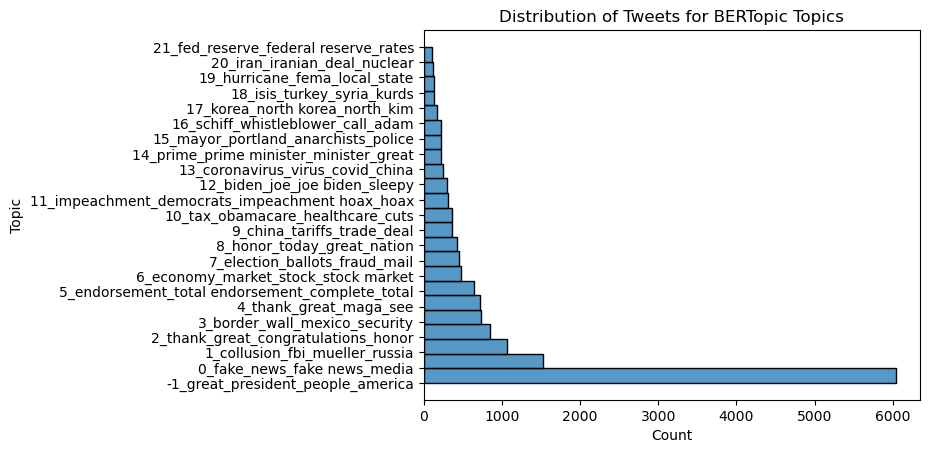

In [129]:
sns.histplot(df_topic,
             y='Topic',
             bins=len(df_topic['Name'].unique()))

plt.yticks(ticks=df_topic['Topic'].unique(),
           labels=df_topic['Name'].unique()
           #rotation=90
           );

plt.title('Distribution of Tweets for BERTopic Topics')

In [83]:
df_merged = pd.merge(df, df_topic, on='text')
df_merged.head()

,Unnamed: 0,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,...,optimism,sadness,primary,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,...,0.056022,0.007108,joy,4,4_thank_great_maga_see,"[thank, great, maga, see, rally]","[I will be going to Green Bay, Wisconsin, for ...",thank - great - maga - see - rally,0.160906,False
1,3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,...,0.016380,0.091920,anger,7,7_election_ballots_fraud_mail,"[election, ballots, fraud, mail, votes]","[RIGGED ELECTION!, RIGGED ELECTION!, I won the...",election - ballots - fraud - mail - votes,1.000000,False
2,6,1223640662689689602,Getting a little exercise this morning! https:...,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f,...,0.178252,0.038491,joy,2,2_thank_great_congratulations_honor,"[thank, great, congratulations, honor, great h...","[Thank you, our great honor! https://t.co/Strc...",thank - great - congratulations - honor - grea...,0.404394,False
3,14,1215247978966986752,Thank you Elise! https://t.co/Y4Hb0zf5jk,f,f,Twitter for iPhone,48510,11608,2020-01-09 12:24:31,f,...,0.101642,0.022816,joy,2,2_thank_great_congratulations_honor,"[thank, great, congratulations, honor, great h...","[Thank you, our great honor! https://t.co/Strc...",thank - great - congratulations - honor - grea...,1.000000,False
4,15,1319491234042269696,"As per your request, Joe... https://t.co/78mzc...",f,f,Twitter for iPhone,253761,79855,2020-10-23 04:09:59,f,...,0.229977,0.138813,ambiguous,-1,-1_great_president_people_america,"[great, president, people, america, thank]","[MAKE AMERICA GREAT AGAIN!, MAKE AMERICA GREAT...",great - president - people - america - thank,0.619823,False


In [84]:
df_merged.to_csv('roberta_bertopic_merged.csv')

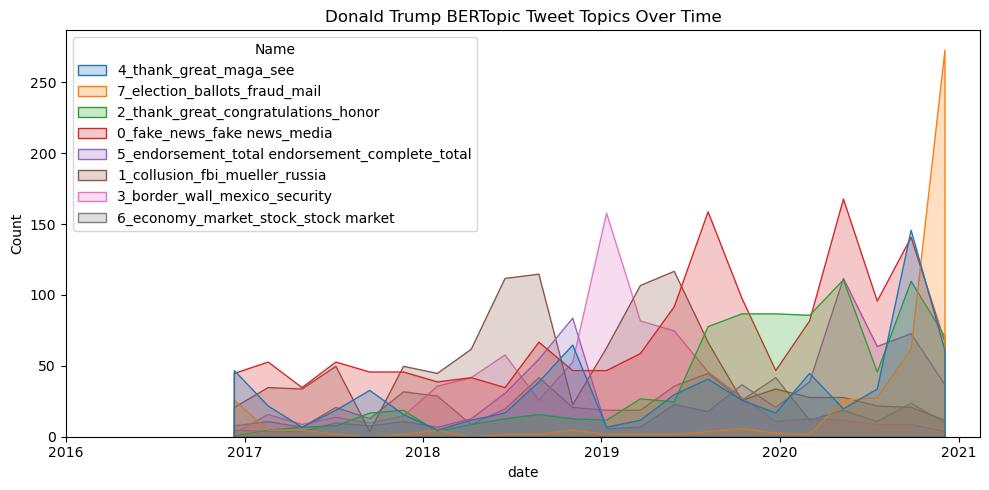

In [146]:
plt.figure(figsize=(10,5))

sns.histplot(
    df_merged[df_merged['Topic'].isin(range(0,8))], x="date", hue="Name", element="poly",
     common_norm=False,
     #legend=False
)

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump BERTopic Tweet Topics Over Time')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit everything
#plt.show()'''

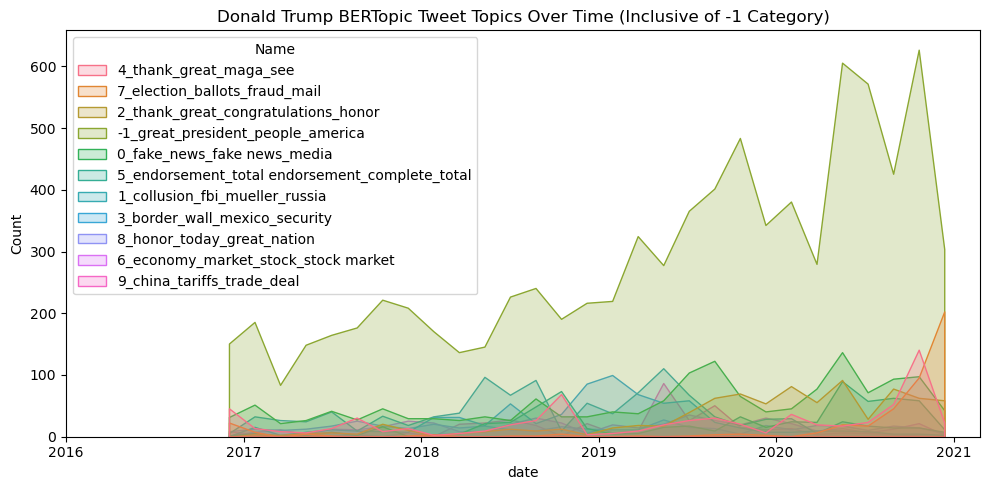

In [110]:
plt.figure(figsize=(10,5))

sns.histplot(
    df_merged[df_merged['Topic'].isin(range(-1,10))], x="date", 
    hue="Name", 
    element="poly",
     common_norm=False,
     #legend=False
)

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump BERTopic Tweet Topics Over Time (Inclusive of -1 Category)')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit everything
#plt.show()'''

## BERTopic and RoBERTa Visualization

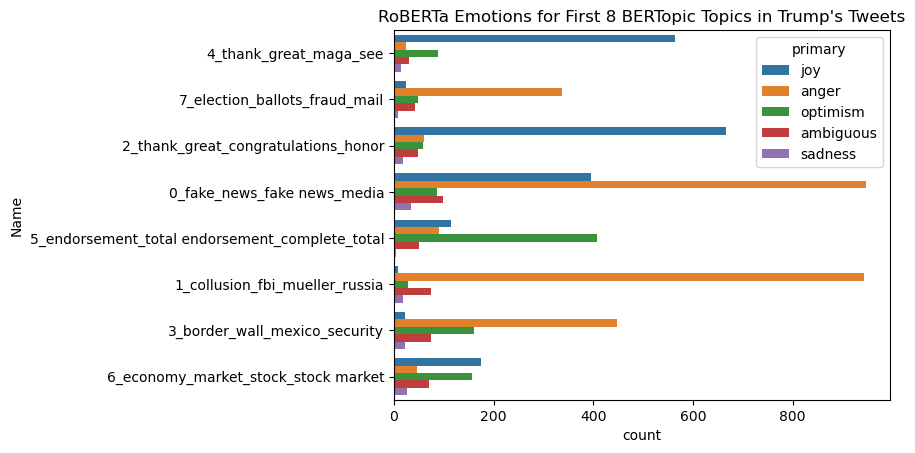

In [161]:
sns.countplot(df_merged[df_merged['Topic'].isin(range(0,8))], 
              y="Name",
              hue="primary");

plt.yticks(ticks=df_merged[df_merged['Topic'].isin(range(0,8))]['Name'].unique(),
           #rotation=45
           );

plt.title('RoBERTa Emotions for First 8 BERTopic Topics in Trump\'s Tweets');

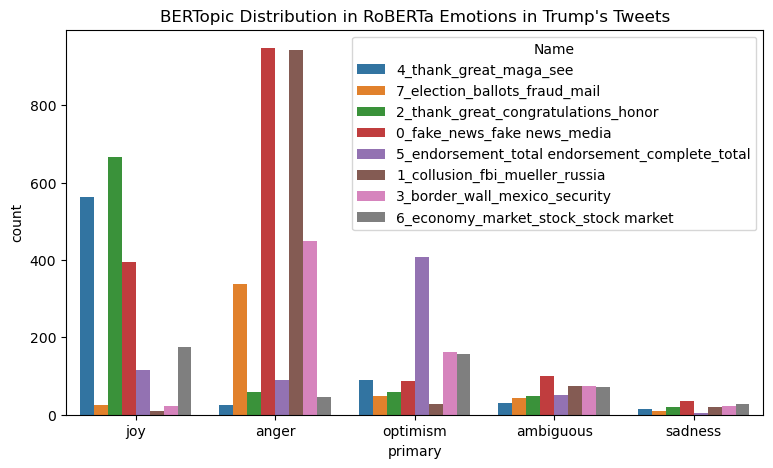

In [159]:
plt.figure(figsize=(9,5))

sns.countplot(df_merged[df_merged['Topic'].isin(range(0,8))], 
              x="primary",
              hue="Name");

plt.xticks(ticks=df_merged[df_merged['Topic'].isin(range(0,8))]['primary'].unique(),
           );

plt.title('BERTopic Distribution in RoBERTa Emotions in Trump\'s Tweets');

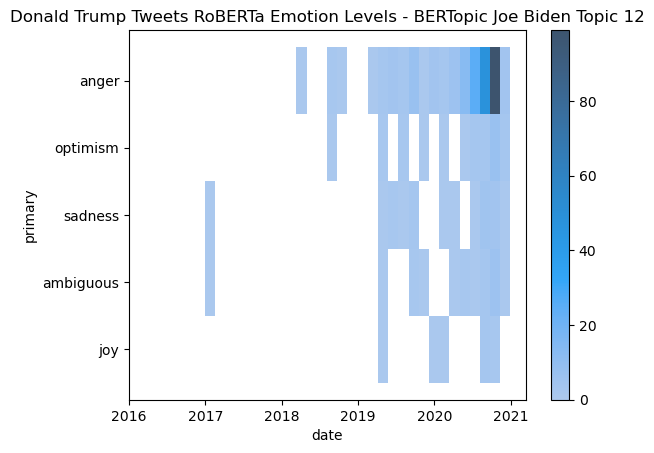

In [163]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['biden']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title(f'Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Joe Biden Topic {topic_dict["biden"]}')

plt.show()

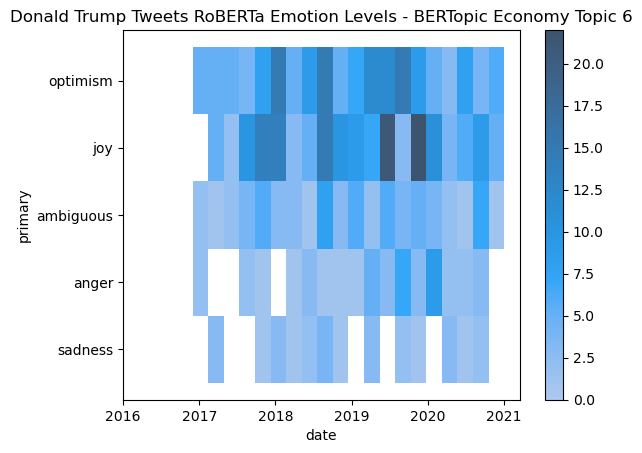

In [164]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['economy']],
             x='date',
             y='primary',
             cbar=True,
             bins=20
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title(f'Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Economy Topic {topic_dict["economy"]}')

plt.show()

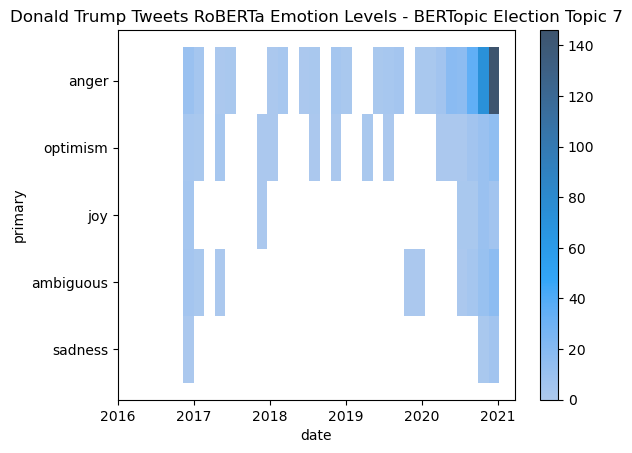

In [166]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['election']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title(f'Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Election Topic {topic_dict["election"]}')

plt.show()

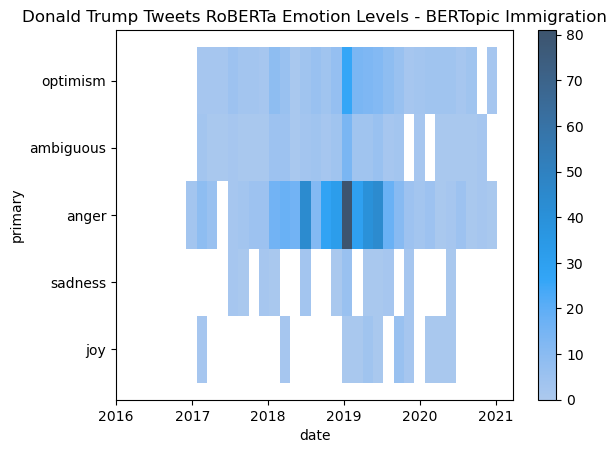

In [117]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['immigration']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Immigration')

plt.show()

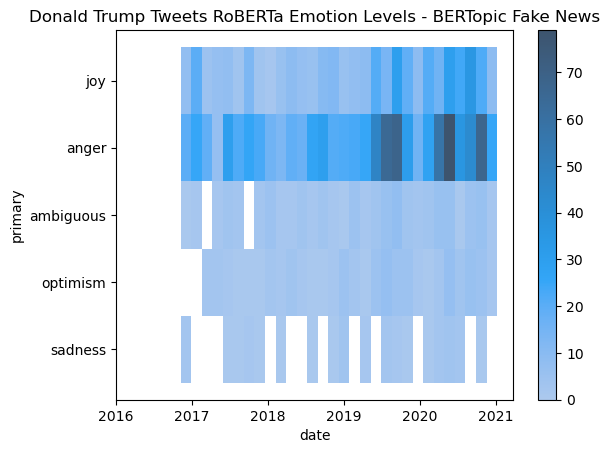

In [118]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['fake_news']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Fake News')

plt.show()

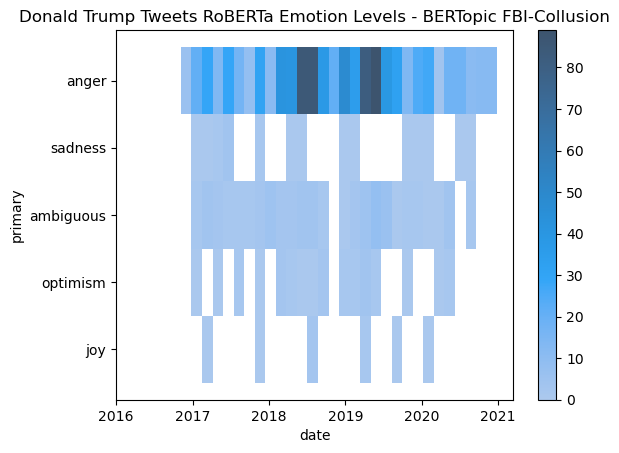

In [119]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['collusion']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic FBI-Collusion')

plt.show()

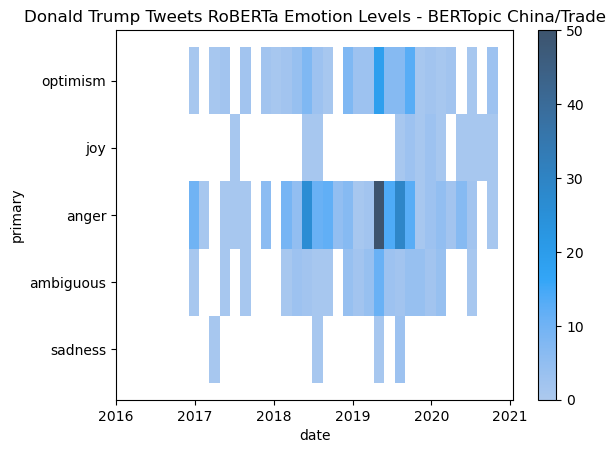

In [172]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['china']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic China/Trade')

plt.show()

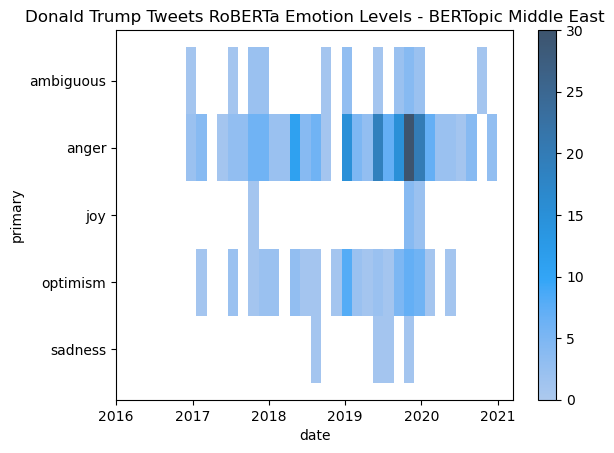

In [175]:
sns.histplot(df_merged[df_merged['Topic'].isin(topic_dict['middle_east'])],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Middle East')

plt.show()

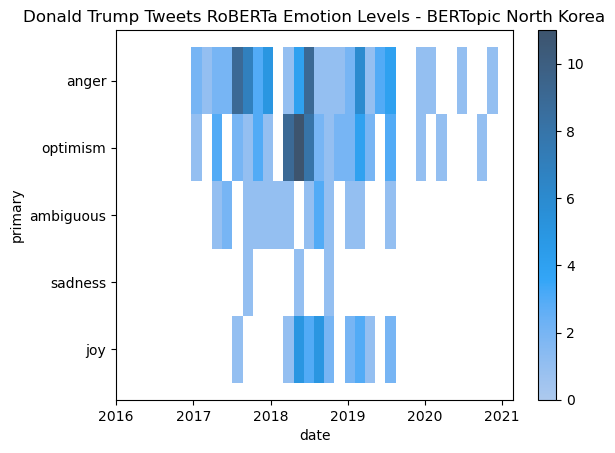

In [176]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['north_korea']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic North Korea')

plt.show()

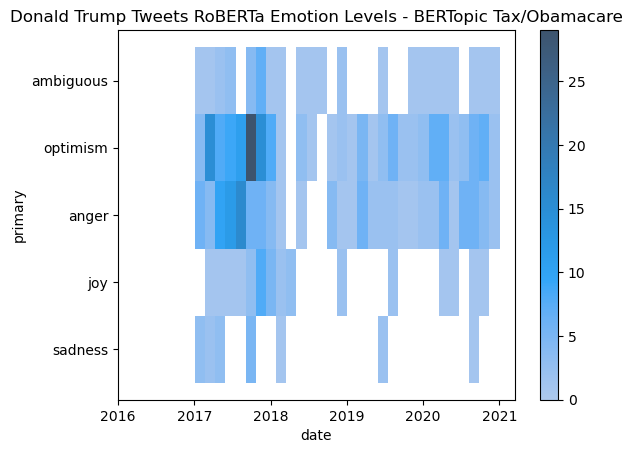

In [167]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['tax']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Tax/Obamacare')

plt.show()

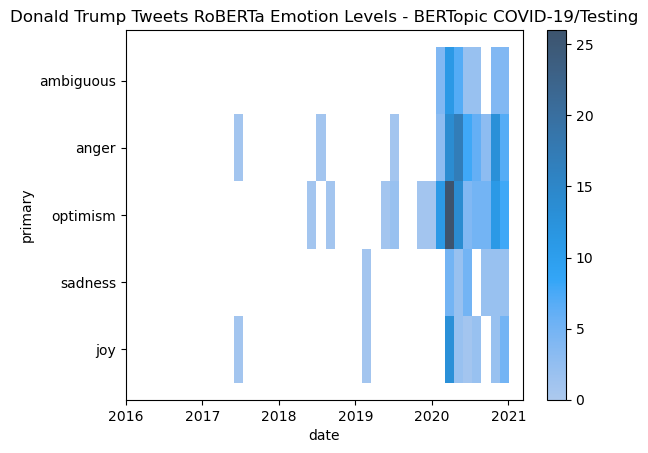

In [169]:
sns.histplot(df_merged[df_merged['Topic']==topic_dict['covid']],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic COVID-19/Testing')

plt.show()

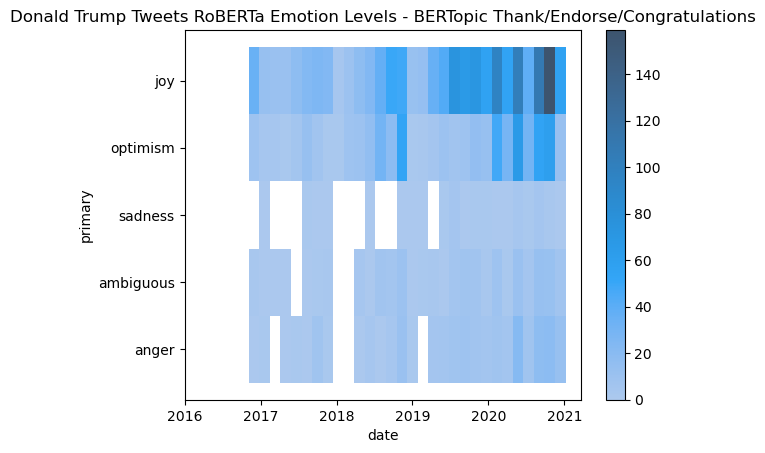

In [171]:
sns.histplot(df_merged[df_merged['Topic'].isin(topic_dict['thank_you'])],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic Thank/Endorse/Congratulations')

plt.show()

## Sanity Check

### Examine Topic -1

In [179]:
topic_model.get_topic_info().iloc[0,4]

['MAKE AMERICA GREAT AGAIN!',
 'MAKE AMERICA GREAT AGAIN!',
 'MAKE AMERICA GREAT AGAIN!']

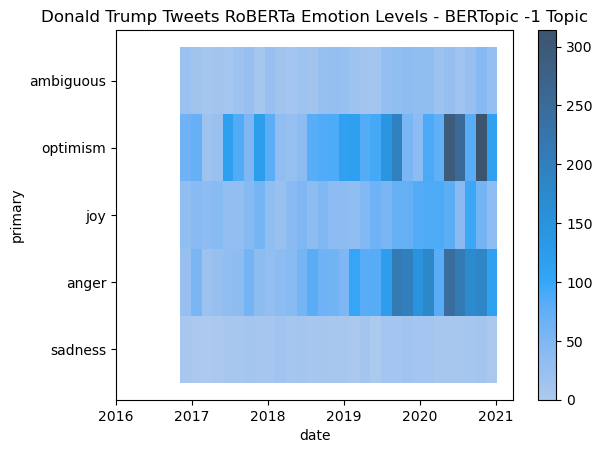

In [180]:
sns.histplot(df_merged[df_merged['Topic']==-1],
             x='date',
             y='primary',
             cbar=True,
             bins=30
             )

plt.xticks(ticks=[date.fromisoformat('2016-01-01'), date.fromisoformat('2017-01-01'),
                   date.fromisoformat('2018-01-01'), date.fromisoformat('2019-01-01'),
                   date.fromisoformat('2020-01-01'), date.fromisoformat('2021-01-01')],
                   labels=['2016','2017','2018','2019','2020','2021'])

plt.title('Donald Trump Tweets RoBERTa Emotion Levels - BERTopic -1 Topic')

plt.show()

In [192]:
for i in df_merged[(df_merged['Topic']==-1) &
          (df_merged['primary']=='optimism')]['text'][-10:]:
    print(i)

....I am doing exactly what I pledged to do, and what I was elected to do by the citizens of our great Country. Just as I promised, I am fighting for YOU!
Drug prices declined in 2018, the first time in nearly half a century. During the first 19 months of my Administration, Americans saved $26 Billion on prescription drugs. Our policies to get cheaper generic drugs to market are working!
H1-B holders in the United States can rest assured that changes are soon coming which will bring both simplicity and certainty to your stay, including a potential path to citizenship. We want to encourage talented and highly skilled people to pursue career options in the U.S.
Our Country is doing so well in so many ways. Great jobs numbers, with a record setting December. We are rebuilding our military. Vets finally have Choice &amp, Accountability. Economy &amp, GDP are strong. Tax &amp, Reg cuts historic. Trade deals great. But we MUST fix our Southern Border!
“The President is the biggest and best s

In [193]:
for i in df_merged[(df_merged['Topic']==-1) &
          (df_merged['primary']=='anger')]['text'][-10:]:
    print(i)

Billions of dollars are sent to the State of California for Forest fires that, with proper Forest Management, would never happen. Unless they get their act together, which is unlikely, I have ordered FEMA to send no more money. It is a disgraceful situation in lives &amp, money!
Billions of dollars are sent to the State of California for Forrest fires that, with proper Forrest Management, would never happen. Unless they get their act together, which is unlikely, I have ordered FEMA to send no more money. It is a disgraceful situation in lives &amp, money!
Our GREAT MILITARY has delivered justice for the heroes lost and wounded in the cowardly attack on the USS Cole. We have just killed the leader of that attack, Jamal al-Badawi. Our work against al Qaeda continues. We will never stop in our fight against Radical Islamic Terrorism!
Drug makers and companies are not living up to their commitments on pricing. Not being fair to the consumer, or to our Country!
....President Trump deserves 

### Examine 'Ambiguous' Tweets

Text(0.5, 1.0, "Distribution of Tweets for BERTopic Topics - 'Ambiguous' Emotion")

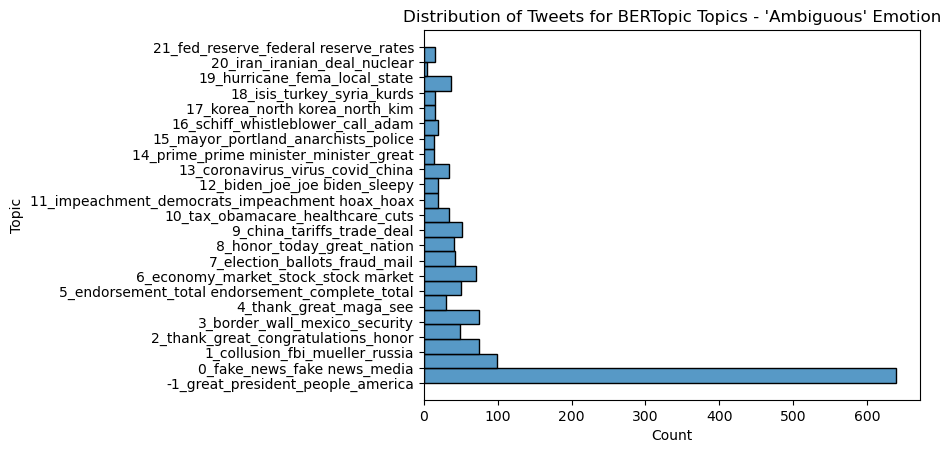

In [195]:
sns.histplot(df_merged[df_merged['primary']=='ambiguous'],
             y='Topic',
             bins=len(df_topic['Name'].unique()))

plt.yticks(ticks=df_topic['Topic'].unique(),
           labels=df_topic['Name'].unique()
           #rotation=90
           );

plt.title('Distribution of Tweets for BERTopic Topics - \'Ambiguous\' Emotion')

### Examine Counterintuitive Tweets

In [202]:
df_merged['date'].dtype

dtype('<M8[ns]')

In [206]:
for i in df_merged[(df_merged['Topic']==topic_dict['covid'])&
          (df_merged['date'] < datetime.fromisoformat('2020-01-01'))]['text']:
    print(i)

....in America, community by community where we will eradicate AIDS in 10 years, program already started. American leadership has proven that together we can save lives.
"Who can figure out the true meaning of ""covfefe"" ???  Enjoy!"
Despite the constant negative press covfefe
Today, I took action to strengthen our Nation’s defenses against biological threats. For the first time in history, the Federal Government has a National Biodefense Strategy to address the FULL RANGE of biological threats! https://t.co/kW7Ug1DA6q
The failing NY Times Fake News story today about breast feeding must be called out. The U.S. strongly supports breast feeding but we don’t believe women should be denied access to formula. Many women need this option because of malnutrition and poverty.
With the #RightToTry Law I signed today, patients with life threatening illnesses will finally have access to experimental treatments that could improve or even cure their conditions. These are experimental treatments an

In [212]:
topic_model.get_topic_info().loc[13,'Representative_Docs']

['Joe Biden is a corrupt politician—the Biden family is looking more &amp; more like a crime family. They took millions of $$ from the Chinese Communists, while Vice President Biden shipped Michigan jobs to China. If Biden wins, China Wins. When we win, Michigan wins, and AMERICA wins! https://t.co/YpnjH8838X',
 'Congratulations to Sleepy Joe Biden!',
 'Sleepy Joe Biden! https://t.co/oZtytImXqq']

In [207]:
for i in df_merged[(df_merged['Topic']==topic_dict['biden'])&
          (df_merged['primary'].isin(['joy', 'optimism']) )]['text']:
    print(i)

A must read. Impossible for Biden to have overcome these, and even greater, odds! https://t.co/cmYFY0va6p
Should President Trump concede to Biden? Poll Results: No: 190,593  (98.9%) Yes: 2,181  (1.1%) Total Votes: 192,774. @gregkellyusa @newsmax For the good of our Country we must prevail!
Congratulations to Sleepy Joe Biden!
Obama worked harder for Hillary Clinton and the losing Clinton Campaign than she worked for herself! Now he’s working with Sleepy Joe - will be same result. MAGA is energized like never before!
I’ve done more in 47 months than Joe Biden has done in 47 years! A vote for Republicans is a vote for the American Dream, and the party of Abraham Lincoln! #MAGA https://t.co/gsFSgh2KPc
Suburban Women are trending strongly to our campaign because they want SAFETY, SECURITY, and love the fact that I terminated the REGULATION that would destroy their neighborhood and with it, the American Dream. Biden would bring the REGULATION back in a MUCH stronger form!!!
“@NewtGingrich P

In [216]:
for i in df_merged[(df_merged['Topic'].isin(topic_dict['thank_you'])) &
                   (df_merged['primary'].isin(['anger', 'sadness']))]['text']:
    print(i)

Landed in Wisconsin. BIG CROWD. On my way!
Nothing! https://t.co/OurKkatwbE
No thanks! https://t.co/IYQSotnMG9
.@SeanParnellUSA is a bright star for Pennsylvania. Military, Vets, Low Taxes and your 2nd Amendment will be totally protected. His opponent is a weak and ineffective puppet for Pelosi and her new Radical Left friends. Vote for Sean Parnell!
Darrell is great. He has my Complete and Total Endorsement. He will Never let you down. WARRIOR!!!! https://t.co/FB0KIHKssM
Senator @CindyHydeSmith delivers for Mississippi! She helped us Cut your Taxes, Secure our Border, and Defend the Second Amendment. Cindy's opponent, Mike Espy, is a Corrupt Politician who will Raise your Taxes and Open your Borders! Vote for Cindy! #MSSEN https://t.co/8YzRzj3ngC
Three BIG Rallies today. Heading to Pennsylvania. I have plenty to say about the dishonesty of the Media and Sleepy Joe. A terrible coverup is happening in our Country!!!
No! https://t.co/2T2Oqsfs4E
Impossible result! https://t.co/QDaxamGs3p


In [ ]:
for i in topic_model.get_topic_info().loc[[3, 5, 6],'Representative_Docs']:
    print(i)

['Thank you, our great honor! https://t.co/StrciEwuWs', 'Thank you, a great honor! https://t.co/9GfT5c8hY0', 'Thank you. My great honor! https://t.co/lhV5VjJEoT']
['I will be going to Green Bay, Wisconsin, for a really big Rally on Saturday Evening. Big crowd expected, much to talk about. MAKE AMERICA GREAT AGAIN!', 'On my way to the Great State of South Carolina. See everyone soon! #MAGA #KAG https://t.co/cjzElGNyDN', 'Getting ready to land in the Great State of Florida. See you soon!']
['Governor @MattBevin has done a wonderful job for the people of Kentucky! He continues to protect your very important Second Amendment. Matt is Strong on Crime and the Border, he Loves our Great Vets and Military. Matt has my Complete and Total Endorsement, and always has!', 'Congressman @MichaelCBurgess has done a Great job representing the people of Texas. He continues to protect your very important Second Amendment. Mike is Strong on Crime and the Border, he Loves our Great Vets and Military. Mike 

: 